In [3]:
# データセットの読み込み
from sklearn.datasets import load_digits
digits = load_digits()

In [5]:
import numpy as np

In [12]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [13]:
digits.images.shape

(1797, 8, 8)

1797のデータと８×８ピクセルのデータが入っている

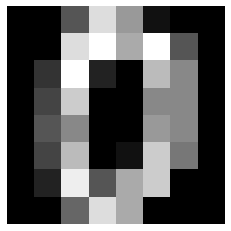

In [16]:
# ライブラリの読み込み
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 軸を削除する
plt.axis('off')

# 画像の出力
plt.imshow(digits.images[0],cmap = 'gray')
plt.show()

In [17]:
# 画像データ→特徴量、but画像は二次元配列だから一次元配列にしたい→元々画像を一次元配列にしてあるデータがある（digits.data）
digits.data.shape

(1797, 64)

point:分析をするときは、特徴量を一次元配列にする！

In [18]:
digits.target.shape

(1797,)

In [19]:
# データセットの処理。画像から数字を予測させたい

x = digits.data
y = digits.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [20]:
# knnモデルのライブラリの読み込み
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# ハイパーパラメータ（投票に参加する投票に参加するデータの個数）の設定
knn = KNeighborsClassifier(n_neighbors = 5)


In [22]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [25]:
# 正解率
y_test_pred = knn.predict(x_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test_pred, y_test)
print('テストデータの正答率:', str(score))

テストデータの正答率: 0.9740740740740741


str()は数字を文字列に変換している

In [26]:
print(x_test.shape)

(540, 64)


つまり、画像データが一次元で格納されているから、reshapeを用いて８×８の二次元に戻す

In [27]:
x_test_images = x_test.reshape(540,8,8)

In [28]:
print(x_test_images.shape)

(540, 8, 8)


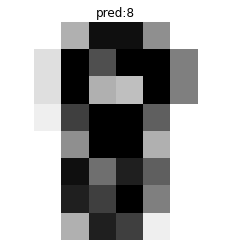

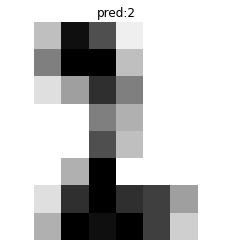

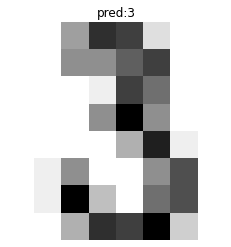

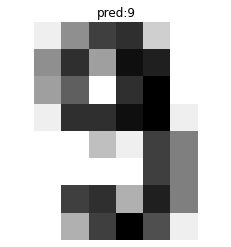

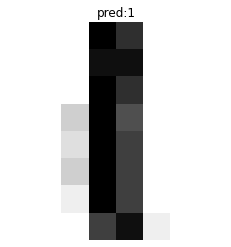

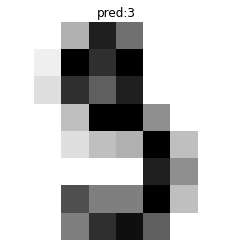

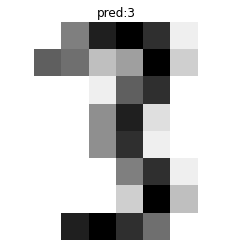

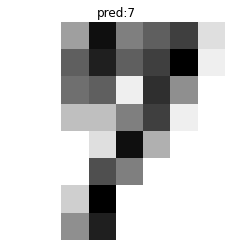

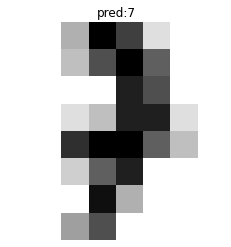

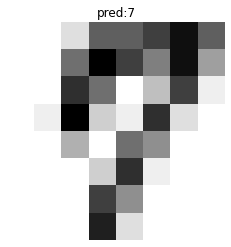

In [31]:
# 画像と予測を出力

for i in range(10):
    plt.axis('off')
    plt.imshow(x_test_images[i], cmap = 'gray_r')
    plt.title('pred:' + str(y_test_pred[i]))
    plt.show()